<a href="https://colab.research.google.com/github/IanQS/zefr_rl_demo/blob/master/zefr_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and installation

In [0]:
!pip install --upgrade tensorflow -q

In [0]:
!apt-get install -y xvfb python-opengl ffmpeg x11-utils > /dev/null 2>&1

# Handle Imports

- Rendering OpenAI Gym in Colab [Guide](https://star-ai.github.io/Rendering-OpenAi-Gym-in-Colaboratory/)

In [0]:
from IPython import display
import numpy as np
import time

import PIL.Image
import io

import tensorflow as tf

import gym
from collections import deque as RingBuffer

# Defining our Model

In [0]:
class CustomModel(tf.keras.Model):
  """
  For learning
  """
  def __init__(self, num_actions):
      # Input shape is (210, 160, 3)
      super().__init__()
      # Dimensionality of input = 210 * 160 (we greyscale)
      self.layer_1 = tf.keras.layers.Conv2D(
          filters=32, kernel_size=(8, 8), strides=(2, 2), activation="relu",
          name="L1"
      )
      self.layer_2 = tf.keras.layers.Conv2D(
          filters=64, kernel_size=(5, 5), strides=(2, 2), activation="relu",
          name="l2"
      )
      self.layer_3 = tf.keras.layers.Conv2D(
          filters=64, kernel_size=(5, 5), strides=(2, 2), activation="relu",
          name="l3"
      )
      self.flatten_layer = tf.keras.layers.Flatten(name="flatten")
      self.layer_4 = tf.keras.layers.Dense(units=512, activation="relu",
                                            name="l4")
      self.output_layer = tf.keras.layers.Dense(num_actions, name="output")

  @tf.function
  def call(self, inputs, training=True):
      greyscaled = tf.reduce_mean(inputs, axis=3, keepdims=True) / 255.0  # (210, 160, 3) -> (210, 160)
      x = self.layer_1(greyscaled)
      x = self.layer_2(x)
      x = self.layer_3(x)
      x = self.flatten_layer(x)
      x = self.layer_4(x)
      x = self.output_layer(x)
      return x


# Defining our Q-learning Tracker

In [0]:
# Based loosely on https://github.com/VXU1230/reinforcement_learning/blob/master/dqn/cart_pole.py

class DeepQNetwork(object):
  def __init__(self, num_states, num_actions, discount_factor, 
               replay_buffer_min, replay_buffer_max, 
               learning_rate):
    self.num_s = num_states
    self.num_a = num_actions
    self.gamma = discount_factor
    self.replay_buffer_min = replay_buffer_min
    self.replay_buffer = RingBuffer([], maxlen=replay_buffer_max)
    self.lr = learning_rate

  def predict(self, inputs):
    return self.model(inputs)

  def take_action(self, )

# Setup Display on Colab

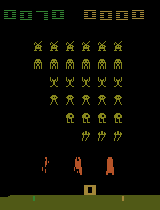

KeyboardInterrupt: ignored

In [16]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = io.BytesIO()
    ima = PIL.Image.fromarray(a).save(f, fmt)
    return f.getvalue()

imagehandle = display.display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')

def evaluate_model(trained_model):
  env = gym.make('SpaceInvaders-v0')
  state = env.reset() 
  while True:
      env.
      time.sleep(0.001)
      action = trained_model.predict(state)
      env.step(env.action_space.sample()) # take a random action
      display.update_display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')